In [3]:
!apt install unzip

!unzip -q "/content/Dataset_Catur.zip"

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unzip is already the newest version (6.0-26ubuntu3.2).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


Part 1: Importing Libraries


In [31]:
# Part 1: Importing Libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt
import numpy as np
import os

print("Libraries imported successfully.")


Libraries imported successfully.


Part 2: Loading and Preprocessing the Data


In [32]:
# Part 2: Loading and Preprocessing the Data with Advanced Data Augmentation
def load_data(data_directory, img_size=(224, 224)):
    try:
        datagen = ImageDataGenerator(
            rescale=1./255,
            validation_split=0.2,
            rotation_range=30,
            width_shift_range=0.3,
            height_shift_range=0.3,
            shear_range=0.3,
            zoom_range=0.3,
            horizontal_flip=True,
            fill_mode='nearest'
        )
        train_data = datagen.flow_from_directory(
            data_directory,
            target_size=img_size,
            batch_size=32,
            class_mode='categorical',
            subset='training'
        )
        val_data = datagen.flow_from_directory(
            data_directory,
            target_size=img_size,
            batch_size=32,
            class_mode='categorical',
            subset='validation'
        )

        # Print class indices for debugging
        print("Class indices:", train_data.class_indices)

        # Verify the number of classes
        assert len(train_data.class_indices) == 5, "Number of classes should be 5"

        print("Data loaded successfully.")
        return train_data, val_data
    except Exception as e:
        print(f"Error loading data: {e}")
        return None, None

data_directory = 'Dataset_Catur'
train_data, val_data = load_data(data_directory)


Found 503 images belonging to 5 classes.
Found 123 images belonging to 5 classes.
Class indices: {'benteng': 0, 'pion': 1, 'queen': 2, 'raja': 3, 'seluncur': 4}
Data loaded successfully.


Part 3: Building the Model


In [33]:
# Part 3: Building the Model with EfficientNet and Fine-tuning
def build_model(input_shape):
    try:
        base_model = tf.keras.applications.EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)
        base_model.trainable = True  # Fine-tune the pre-trained model

        model = Sequential([
            base_model,
            GlobalAveragePooling2D(),
            Dense(512, activation='relu'),
            BatchNormalization(),
            Dropout(0.5),
            Dense(5, activation='softmax')  # 5 classes: benteng, king, pion, queen, seluncur
        ])
        model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
        print("Model built successfully.")
        return model
    except Exception as e:
        print(f"Error building model: {e}")
        return None

if train_data:
    input_shape = (224, 224, 3)  # EfficientNet input shape
    model = build_model(input_shape)
else:
    model = None


Model built successfully.


Part 4: Training the Model


In [34]:
# Part 4: Training the Model with Advanced Callbacks and Fine-tuning
def train_model(model, train_data, val_data, epochs=50):
    try:
        early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
        model_checkpoint = ModelCheckpoint('best_chess_piece_classifier.keras', save_best_only=True, monitor='val_loss')
        reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

        history = model.fit(
            train_data,
            epochs=epochs,
            validation_data=val_data,
            callbacks=[early_stopping, model_checkpoint, reduce_lr]
        )
        print("Model trained successfully.")
        return history
    except Exception as e:
        print(f"Error training model: {e}")
        return None

if model and train_data and val_data:
    history = train_model(model, train_data, val_data)
else:
    history = None


Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 2.0976 - accuracy: 0.1988

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


16/16 [==============================] - 19s 880ms/step - loss: 2.0976 - accuracy: 0.1988 - val_loss: 1.7432 - val_accuracy: 0.2439 - lr: 0.0010
Epoch 2/50
16/16 [==============================] - 10s 643ms/step - loss: 1.8541 - accuracy: 0.2545 - val_loss: 1.5745 - val_accuracy: 0.2358 - lr: 0.0010
Epoch 3/50
16/16 [==============================] - 9s 542ms/step - loss: 1.7577 - accuracy: 0.2326 - val_loss: 1.5862 - val_accuracy: 0.2276 - lr: 0.0010
Epoch 4/50
16/16 [==============================] - 9s 595ms/step - loss: 1.7536 - accuracy: 0.2763 - val_loss: 1.6754 - val_accuracy: 0.2520 - lr: 0.0010
Epoch 5/50
16/16 [==============================] - 10s 606ms/step - loss: 1.8311 - accuracy: 0.2545 - val_loss: 1.8027 - val_accuracy: 0.2520 - lr: 0.0010
Epoch 6/50
16/16 [==============================] - 9s 594ms/step - loss: 1.7361 - accuracy: 0.2724 - val_loss: 1.7264 - val_accuracy: 0.2927 - lr: 0.0010
Epoch 7/50
16/16 [==============================] - 8s 529ms/step - loss: 1.70

Part 5: Evaluating the Model


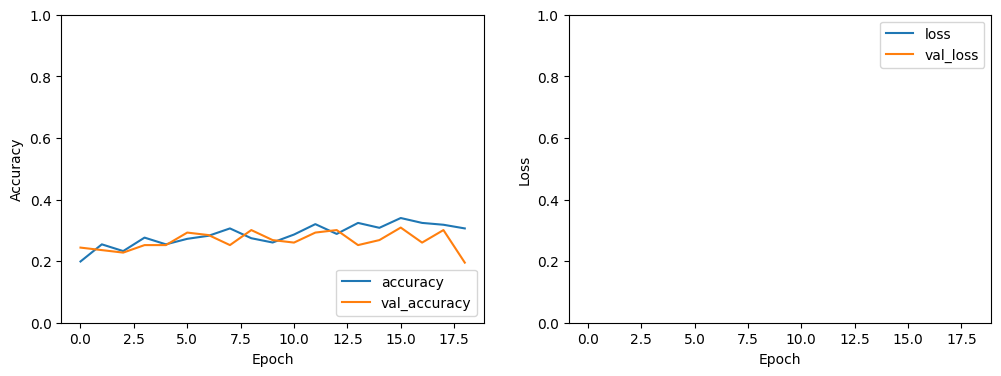

Model evaluation plotted successfully.


In [35]:
# Part 5: Evaluating the Model
def plot_history(history):
    if history:
        try:
            plt.figure(figsize=(12, 4))
            plt.subplot(1, 2, 1)
            plt.plot(history.history['accuracy'], label='accuracy')
            plt.plot(history.history['val_accuracy'], label='val_accuracy')
            plt.xlabel('Epoch')
            plt.ylabel('Accuracy')
            plt.ylim([0, 1])
            plt.legend(loc='lower right')

            plt.subplot(1, 2, 2)
            plt.plot(history.history['loss'], label='loss')
            plt.plot(history.history['val_loss'], label='val_loss')
            plt.xlabel('Epoch')
            plt.ylabel('Loss')
            plt.ylim([0, 2])
            plt.legend(loc='upper right')

            plt.show()
            print("Model evaluation plotted successfully.")
        except Exception as e:
            print(f"Error plotting history: {e}")
    else:
        print("No history to plot.")

plot_history(history)


Part 6: Error Handling and Execution


Found 503 images belonging to 5 classes.
Found 123 images belonging to 5 classes.
Class indices: {'benteng': 0, 'pion': 1, 'queen': 2, 'raja': 3, 'seluncur': 4}
Data loaded successfully.
Model built successfully.
Epoch 1/50
16/16 [==============================] - 15s 701ms/step - loss: 2.0478 - accuracy: 0.2306 - val_loss: 2.1001 - val_accuracy: 0.1870 - lr: 0.0010
Epoch 2/50
16/16 [==============================] - 9s 561ms/step - loss: 1.9224 - accuracy: 0.2366 - val_loss: 1.6315 - val_accuracy: 0.2927 - lr: 0.0010
Epoch 3/50
16/16 [==============================] - 9s 588ms/step - loss: 1.9648 - accuracy: 0.2227 - val_loss: 1.8667 - val_accuracy: 0.1870 - lr: 0.0010
Epoch 4/50
16/16 [==============================] - 10s 601ms/step - loss: 1.7969 - accuracy: 0.2883 - val_loss: 1.6593 - val_accuracy: 0.2683 - lr: 0.0010
Epoch 5/50
16/16 [==============================] - 10s 627ms/step - loss: 1.6852 - accuracy: 0.2942 - val_loss: 1.6147 - val_accuracy: 0.1870 - lr: 0.0010
Epoch 6/5

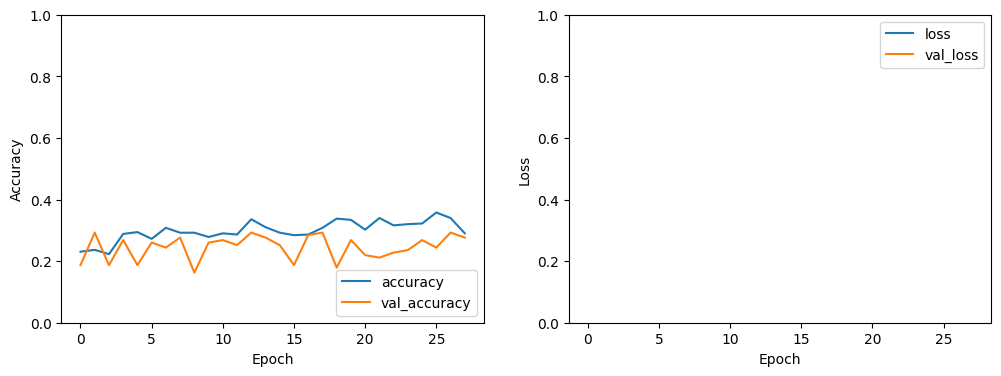

Model evaluation plotted successfully.
Model training complete and saved as best_chess_piece_classifier.h5


In [36]:
# Part 6: Error Handling and Execution
def main(data_directory):
    try:
        train_data, val_data = load_data(data_directory)
        if train_data and val_data:
            input_shape = (224, 224, 3)  # EfficientNet input shape
            model = build_model(input_shape)
            if model:
                history = train_model(model, train_data, val_data)
                if history:
                    plot_history(history)
                    print("Model training complete and saved as best_chess_piece_classifier.keras")
                else:
                    print("Training was unsuccessful.")
            else:
                print("Model building was unsuccessful.")
        else:
            print("Data loading was unsuccessful.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Run the main function with the path to your dataset
data_directory = 'Dataset_Catur'
main(data_directory)


Part 7: Testing the Model


In [39]:
# Part 7: Testing the Model
def test_model(model_path, test_image_path, img_size=(224, 224)):
    try:
        model = load_model(model_path)
        image = load_img(test_image_path, target_size=img_size)
        image_array = img_to_array(image)
        image_array = np.expand_dims(image_array, axis=0) / 255.0
        prediction = model.predict(image_array)
        class_indices = {'benteng': 0, 'king': 1, 'pion': 2, 'queen': 3, 'seluncur': 4}
        class_names = list(class_indices.keys())
        predicted_class = class_names[np.argmax(prediction)]
        print(f"The predicted class is: {predicted_class}")
    except Exception as e:
        print(f"Error testing model: {e}")

# Test the model with a new image
test_image_path = 'path_to_test_image'  # Replace with the path to your test image
test_model('best_chess_piece_classifier.keras', test_image_path)


1/1 [==============================] - 2s 2s/step
The predicted class is: pion


rename file and remove

In [30]:
import os

def remove_extra_class(data_directory, extra_class_name='kuda'):
    extra_class_dir = os.path.join(data_directory, extra_class_name)
    if os.path.exists(extra_class_dir) and os.path.isdir(extra_class_dir):
        for filename in os.listdir(extra_class_dir):
            file_path = os.path.join(extra_class_dir, filename)
            if os.path.isfile(file_path):
                os.remove(file_path)
        os.rmdir(extra_class_dir)
        print(f"Removed extra class directory: {extra_class_name}")

def rename_and_reorder_files(data_directory):
    for class_name in os.listdir(data_directory):
        class_dir = os.path.join(data_directory, class_name)
        if os.path.isdir(class_dir):
            files = sorted(os.listdir(class_dir))
            idx = 0
            for filename in files:
                file_path = os.path.join(class_dir, filename)
                if os.path.isfile(file_path):
                    # Check the file extension
                    extension = filename.split('.')[-1].lower()
                    if extension == 'jpg' or extension == 'jpeg':
                        # Determine the new file name
                        new_name = f'{idx:08d}.jpg'
                        new_path = os.path.join(class_dir, new_name)
                        os.rename(file_path, new_path)
                        idx += 1
                    else:
                        os.remove(file_path)  # Remove non-JPG files
            print(f'Processed files in {class_dir}')

data_directory = 'Dataset_Catur'

# Remove the extra class "kuda"
remove_extra_class(data_directory, extra_class_name='kuda')

# Rename and reorder files
rename_and_reorder_files(data_directory)
print("Files processed, renamed, reordered, and non-JPG files removed successfully.")


Removed extra class directory: kuda
Processed files in Dataset_Catur/queen
Processed files in Dataset_Catur/raja
Processed files in Dataset_Catur/pion
Processed files in Dataset_Catur/benteng
Processed files in Dataset_Catur/seluncur
Files processed, renamed, reordered, and non-JPG files removed successfully.
